**Problem Statement**

StackOverflow is a website being used by programmers and testers across the globe    frequently , queries are put on by a user and various experts from the field try to answer the queries as per their expertise, the best answers are upvoted and profile rank of the user answering the question increases , and if there are more queries related to the similar matter the user posted the previous best answer are recommended to answer more queries as per their domain knowledge on the subject.
The Question and related answers are saved by StackOverflow in their databases , so if a new user asks the same or related question StackOverflow can recommend the most relevant matching question which has already been answered previously by others.In the following case study we need to do the same thing. Given a user input question , what are the most similar questions already being answered in the stackoverflow should be shown , the most relevant answer should be shown at the top . For example “what is main in c” , if a user asked the question , all the similar questions that are  already being answered in the stack overflow  should be shown as per the relevance.
The business constraint we face here is that , our model should work fast, it should have low latency The solution should have low server costs, meaning it can handle high query per second , less number of servers should be used and costs per server should be less , that means it should utilize less resources and give us the best result in very less time.The solution should order the result in the relevance to the question asked by the user , that is the most relevant answer should be at the top  and the least relevant answer should be at the bottom.
 

**ML Problem**

This problem can be mapped as a ml problem in terms of vector similarity , all the sentences can be converted to vectors , the most preferred way for finding similarity between dense vectors is the cosine similarity.  The two vectors that are more similar are near to each other , the similarity score of the cosine similarity lies between [-1,1], the less the score the nearer the vectors are to each other.
 


# Exploratory Data Analysis

Exploratory Data Analysis

In [ ]:
# https://www.kaggle.com/shekharsinghk/beyond-queries-exploring-the-bigquery-api-d8ada1?scriptVersionId=84170592
from google.cloud import bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!gdown --id 1re_y6MuaQ3cJi0ERaj1mRrUg9HUaEEm-

Downloading...
From: https://drive.google.com/uc?id=1re_y6MuaQ3cJi0ERaj1mRrUg9HUaEEm-
To: /content/certain-torus-337805-54caa90ec9ec.json
100% 2.34k/2.34k [00:00<00:00, 995kB/s]


In [ ]:
project_id = 'certain-torus-337805'

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/certain-torus-337805-54caa90ec9ec.json"

In [ ]:
# intializing client library object
client = bigquery.Client()

In [ ]:
# stackoverflow is the dataset refence
hn_dataset_ref = client.dataset('stackoverflow', project='bigquery-public-data')

In [ ]:
#creating the object for dataset
hn_dset = client.get_dataset(hn_dataset_ref)

In [ ]:
[x.table_id for x in client.list_tables(hn_dset)]

['badges',
 'comments',
 'post_history',
 'post_links',
 'posts_answers',
 'posts_moderator_nomination',
 'posts_orphaned_tag_wiki',
 'posts_privilege_wiki',
 'posts_questions',
 'posts_tag_wiki',
 'posts_tag_wiki_excerpt',
 'posts_wiki_placeholder',
 'stackoverflow_posts',
 'tags',
 'users',
 'votes']

In [ ]:
hn_answer = client.get_table(hn_dset.table('posts_answers'))

In [ ]:
hn_question = client.get_table(hn_dset.table('posts_questions'))

In [ ]:
type(hn_answer)

google.cloud.bigquery.table.Table

In [ ]:
hn_answer.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('title', 'STRING', 'NULLABLE', None, ()),
 SchemaField('body', 'STRING', 'NULLABLE', None, ()),
 SchemaField('accepted_answer_id', 'STRING', 'NULLABLE', None, ()),
 SchemaField('answer_count', 'STRING', 'NULLABLE', None, ()),
 SchemaField('comment_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('community_owned_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('creation_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('favorite_count', 'STRING', 'NULLABLE', None, ()),
 SchemaField('last_activity_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_edit_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_editor_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('last_editor_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('owner_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('owner_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('parent_id', '

Schema for posts_questions table

In [ ]:
hn_question.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('title', 'STRING', 'NULLABLE', None, ()),
 SchemaField('body', 'STRING', 'NULLABLE', None, ()),
 SchemaField('accepted_answer_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('answer_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('comment_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('community_owned_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('creation_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('favorite_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('last_activity_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_edit_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_editor_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('last_editor_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('owner_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('owner_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('parent_id'

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_gbq.html
# https://www.kaggle.com/sohier/how-to-integrate-bigquery-pandas
import pandas as pd
query = "SELECT title,tags,score,body FROM `bigquery-public-data.stackoverflow.posts_questions`  LIMIT 15000;"
df = client.query(query).to_dataframe()

In [ ]:
df

title  ...                                               body
0      Request for business data analysis and strateg...  ...  <p>I have a database that contains information...
1      The ability to search or categorize stackoverf...  ...  <p>I do not know if this is the place to sugge...
2      How to use AutoDesk FBX SDK to build a new FBX...  ...  <p>How to build and export an FBX model from s...
3      Firebase Realtime Database connection killed: ...  ...  <p>I am trying to build a simple login user au...
4                Simple example of Pandas ExtensionArray  ...  <p>It seems to me that Pandas <code>ExtensionA...
...                                                  ...  ...                                                ...
14995                      WP Product Categories in menu  ...  <p>I would like to know how I can dynamically ...
14996  Horizontal Range Bar Chart with date range in ...  ...  <p>I'm looking for a chart library to plot bel...
14997           Get specific column data in mysql nodejs  ...  <p>I have a database that stores a username an...
14998                Auto refresh data table of database  ...  <p>I wanted to know that in postgresql we can ...
14999  Custom Calendar -How to make a list of all the...  ...  <p>I would like to create a <strong>calendar i...

[15000 rows x 4 columns]

REMOVE Duplicates

In [ ]:
# REMOVE duplicates from dataframe 
df1=df.drop_duplicates()

In [ ]:
df1

title  ...                                               body
0      Request for business data analysis and strateg...  ...  <p>I have a database that contains information...
1      The ability to search or categorize stackoverf...  ...  <p>I do not know if this is the place to sugge...
2      How to use AutoDesk FBX SDK to build a new FBX...  ...  <p>How to build and export an FBX model from s...
3      Firebase Realtime Database connection killed: ...  ...  <p>I am trying to build a simple login user au...
4                Simple example of Pandas ExtensionArray  ...  <p>It seems to me that Pandas <code>ExtensionA...
...                                                  ...  ...                                                ...
14995                      WP Product Categories in menu  ...  <p>I would like to know how I can dynamically ...
14996  Horizontal Range Bar Chart with date range in ...  ...  <p>I'm looking for a chart library to plot bel...
14997           Get specific column data in mysql nodejs  ...  <p>I have a database that stores a username an...
14998                Auto refresh data table of database  ...  <p>I wanted to know that in postgresql we can ...
14999  Custom Calendar -How to make a list of all the...  ...  <p>I would like to create a <strong>calendar i...

[15000 rows x 4 columns]

In [ ]:
df1.tags.duplicated().sum()

2035

In [ ]:
df1.title.duplicated().sum()

0

In [ ]:
df1.body.duplicated().sum()

0

**Checking for empty values**

In [ ]:
df1.isna().any()

title    False
tags     False
score    False
body     False
dtype: bool

**Average Length of title**

In [ ]:
avg_len = 0
count = 0
list1 = []
len_string = []
for index,value in enumerate(list(df1['title'])):
    b = len(value)
    avg_len += b
    count +=1
    list1.append(value)
    len_string.append(b)
print (avg_len/count)    


62.25646666666667


In [ ]:
list1.sort(key=len)
sorted_list = [len(i) for  i in list1 ]
sorted_list_top_20 = sorted_list[-20:]
sorted_list_bottom_20 = sorted_list[:20]
print (sorted_list_bottom_20)
print (sorted_list_top_20)

[15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17]
[150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150]


Average Length of title is around 62

**Plot top 20 and bottom 20 length of title**

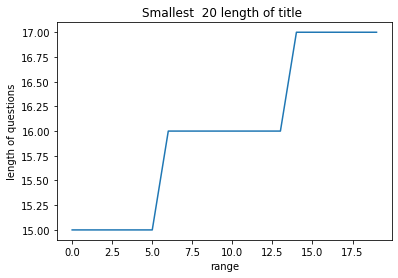

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(20),sorted_list_bottom_20)
plt.xlabel("range")
plt.ylabel("length of questions")
plt.title("Smallest  20 length of title ")
plt.show()

Top 20 smallest  length of title, first 10 title length has 15 and rest 10 has 16 length
while average length of title is around 62

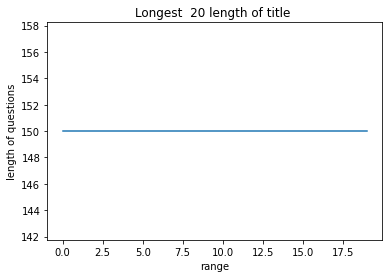

In [ ]:
plt.plot(range(20),sorted_list_top_20)
plt.xlabel("range")
plt.ylabel("length of questions")
plt.title("Longest  20 length of title ")
plt.show()

All the top 20 questions titles have length of 150 .

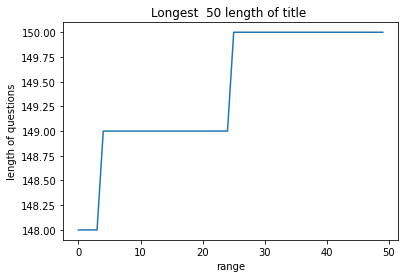

In [ ]:
# Longest 50 length of questions
sorted_list_top_50 = sorted_list[-50:]
plt.plot(range(50),sorted_list_top_50)
plt.xlabel("range")
plt.ylabel("length of questions")
plt.title("Longest  50 length of title ")
plt.show()

Length of top 40 question  title  has 150 length, in the range from 40-50  question title has length of 149.0.     

In [ ]:
def split_tag(sent):
    return len(sent.split('|'))

In [ ]:
new_list = []
for index,values in  enumerate(list(df1['tags'])):
    new_list.append(split_tag(values))

In [ ]:
df1['number_of_tags'] = new_list

In [ ]:
df1['len_of_title'] = len_string

In [ ]:
df1

title  ... len_of_title
0      Request for business data analysis and strateg...  ...           59
1      The ability to search or categorize stackoverf...  ...           59
2      How to use AutoDesk FBX SDK to build a new FBX...  ...           52
3      Firebase Realtime Database connection killed: ...  ...           62
4                Simple example of Pandas ExtensionArray  ...           39
...                                                  ...  ...          ...
14995                      WP Product Categories in menu  ...           29
14996  Horizontal Range Bar Chart with date range in ...  ...           52
14997           Get specific column data in mysql nodejs  ...           40
14998                Auto refresh data table of database  ...           35
14999  Custom Calendar -How to make a list of all the...  ...           73

[15000 rows x 6 columns]

**Length of question vs score**

In [ ]:
import numpy as np
import seaborn as sns


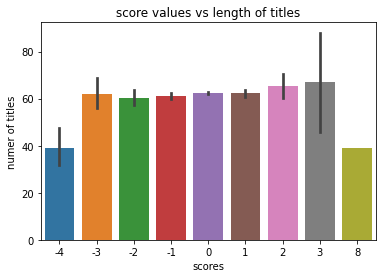

In [ ]:

number_title = list (df1['len_of_title'].values)
scores   = list (df1['score'].values)
sns.barplot(x=scores,y=number_title)

plt.xlabel('scores')
plt.ylabel('numer of titles')

plt.title(" score values vs length of titles ")

plt.show()


Almost every 

**Tag Count vs score values**

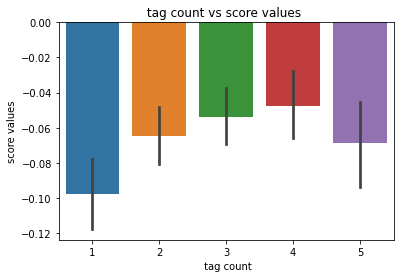

In [ ]:
tags     = list(df1['number_of_tags'].values)
scores   = list(df1['score'].values)
sns.barplot(x=tags,y=scores)
plt.title(" tag count vs score values  ")
plt.xlabel(' tag count')
plt.ylabel('score values')

plt.show()

Tag count more than 1 have good scoring values excecpt some of the tag counts with 3.

**Scores Distribution**

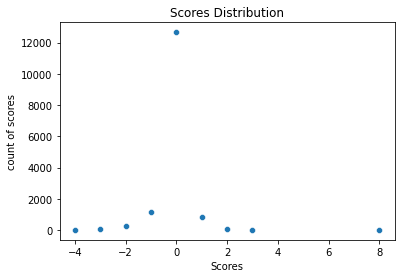

In [ ]:

dict1 = df1.score.value_counts().to_dict()

 
sns.scatterplot(x=list(dict1.keys()),y=list(dict1.values()))
plt.xlabel('Scores')
plt.ylabel('count of scores')

plt.title('Scores Distribution')
plt.show()


This shows that most of the title of the questions are scored zero

**Count of Tags Distribution**

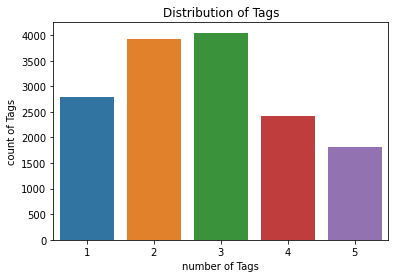

In [ ]:
# number_of_tags
dict1 = df1.number_of_tags.value_counts().to_dict()
sns.barplot(x=list(dict1.keys()),y=list(dict1.values()))
plt.xlabel('number of Tags')
plt.ylabel('count of Tags')
plt.title('Distribution of Tags')
plt.show()


Tags with count 3 are more in the data compared to any other number of Tags

**Length of Titles**

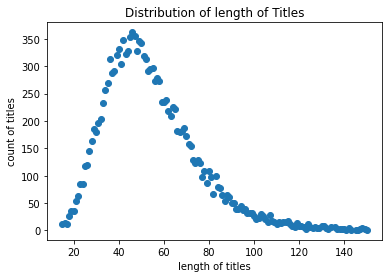

In [ ]:
#len_of_title
dict1 = df1.len_of_title.value_counts().to_dict()
plt.scatter(list(dict1.keys()),list(dict1.values()))
plt.xlabel('length of titles')
plt.ylabel('count of titles')
plt.title('Distribution of length of Titles')
plt.show()


Most number of titles present have length around 40 to 70.

**Most frequent tags used**

In [ ]:
dict1 = dict()
for index,value in enumerate(list(df1['tags'])):
    values = value.split('|')
    #print ("values=",values)
    for i in  values:
        # convert every string to lower
        i = i.lower()
        if dict1.get(i,-1)==-1:
            dict1[i]=0
        else:
            #print ("already there\n{}".format(i))
            dict1[i]=dict1[i]+1
            

In [ ]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value 
dict1 = {k: v for k, v in sorted(dict1.items(), key=lambda item: item[1],reverse=True)}

**Number of Tags**

In [ ]:
count =  len(list(dict1.keys()))
print  ("Number of uniques Tags are",count)

Number of uniques Tags are 6832


**Average Length of Tags**

In [ ]:
dict_no_tags = df1.number_of_tags.value_counts().to_dict()
sum = 0
#count = len(list(dict_no_tags.keys()))
for key,value in dict_no_tags.items():
  sum +=value
val = sum/count
print ("Average length of Tags are",val)  

Average length of Tags are 2.1955503512880563


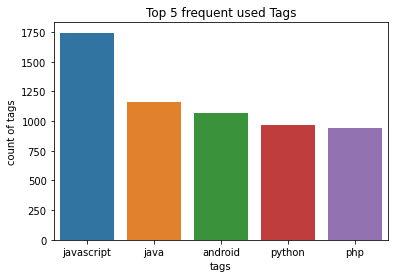

In [ ]:
x = list(dict1.keys())
y = list(dict1.values())

sns.barplot(x=x[:5],y=y[:5])
plt.xlabel("tags")
plt.ylabel("count of tags")
plt.title("Top 5 frequent used Tags")
plt.show()

Most used Tags are
 Python
 JavaScript
 Reactjs
 Java
 Html

**Distribution of all tags**




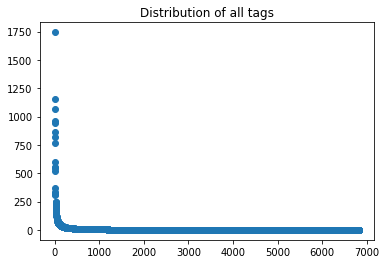

In [ ]:
y = list(dict1.values())
plt.scatter(range(len(y)),y) 
plt.title("Distribution of all tags")
plt.show()

Most of the tags are fewer are in numbers

**Tag Count vs Length of Titles**

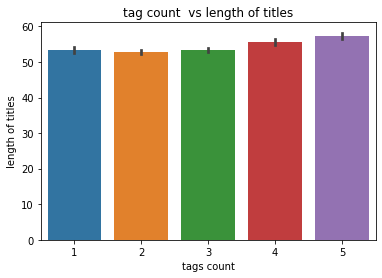

In [ ]:
number_title =  list (df1['len_of_title'].values)
tags     = list(df1['number_of_tags'].values)
sns.barplot(x=tags,y=number_title)
plt.xlabel('tags count')
plt.ylabel('length of titles')
plt.title("tag count  vs length of titles")
plt.show()


The length of titles is proportional to number of tags being used.

**Data Preprocessing**

In [ ]:
# Taken from previous assignments
# # https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
#remove HTML from the Text column and save in the Text column only
# https://www.w3resource.com/python-exercises/pandas/string/python-pandas-string-exercise-41.php
import re as re
def remove_tags(string):
    # https://developpaper.com/analyze-the-meaning-of-in-regular-expression/
    # dot means anything can go here and * means zero or more
    # a.*?bMatches the shortest string that starts with a and ends with B. If you apply it toaababIt will matchaab(first to third characters) andab(fourth to fifth characters). 
    result = re.sub('<.*?>','',string)
    return result



In [ ]:
# applying changes to the title and body column
df1['title'] = df1['title'].apply(lambda cw : remove_tags(cw))
df1['body']  = df1['body'].apply(lambda cw: remove_tags(cw))
df1['title'] = df1['title'].apply(lambda cw:decontracted(cw))
df1['body']  = df1['body'].apply(lambda cw:decontracted(cw))

In [ ]:
df1[:10]['body']

0    I am developing an application which needs a l...
1    I am listening to layout changes of a view usi...
2    I try to Implement some stuff with React, Rela...
3    I have a conditional format to color the backg...
4    we have a table with 350+ columns. pojo class ...
5    I am using wordpress with ajax in a frontend f...
6    Error message \n\n\n  VM556 angular2-polyfills...
7    When I try to install any extension in Visual ...
8    I have a Jenkins 2.0 pipeline, with a groovysc...
9    I am using a query parameters to set the value...
Name: body, dtype: object

**Converting everthying to space except Characters**

In [ ]:
df2 = df1

In [ ]:
def remove_all(words):
    # convert everything else other than  alphabet characters
    # inside square bracket it is used as a not operator
    # outside of the bracket it is used to match the first character
    words = words.lower() 
    result = re.sub('[^a-zc++c#]',' ',words)
    result = result.lower()
    return result

    

In [ ]:
df1['title'] = df1['title'].apply(lambda cw : remove_all(cw))
df1['body']  = df1['body'].apply(lambda cw: remove_all(cw))
    

In [ ]:
df1[:10]['body']

0    i am developing an application which needs a l...
1    i am listening to layout changes of a view usi...
2    i try to implement some stuff with react  rela...
3    i have a conditional format to color the backg...
4    we have a table with    + columns  pojo class ...
5    i am using wordpress with ajax in a frontend f...
6    error message      vm    angular  polyfills js...
7    when i try to install any extension in visual ...
8    i have a jenkins     pipeline  with a groovysc...
9    i am using a query parameters to set the value...
Name: body, dtype: object

**Remove Stopwords**

In [ ]:
# https://machinelearningknowledge.ai/complete-tutorial-for-nltk-stopwords/
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_words(word):
    # remove all the stop words
    neword = [i for i in word.split() if i not in nltk.corpus.stopwords.words('english')]
    neword = ' '.join(neword)
    return neword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1['title'] = df1['title'].apply(lambda cw : remove_words(cw))
df1['body']  = df1['body'].apply(lambda cw: remove_words(cw))
    


In [ ]:
df1[:10]['title']

0          alternative converting canvas writableimage
1    removed viewtreeobserver listener cause memory...
2    relaycontainer expected prop supplied + got un...
3    google sheets conditional formatting overridin...
4                 jackson serialize csv property order
5                 wordpress ajax upload image featured
6    location hashlocationstrategy stopped working ...
7    extensions found running visual studio code so...
8    error expected named arguments parallel jenkin...
9                         retrofit url query parameter
Name: title, dtype: object

In [ ]:
df1[:10]['body']

0    developing application needs lot comparing ima...
1    listening layout changes view using ongloballa...
2    try implement stuff react relay graphql faced ...
3    conditional format color background even rows ...
4    table + columns pojo class generated getters o...
5    using wordpress ajax frontend form would need ...
6    error message vm angular polyfills js error to...
7    try install extension visual studio code e pre...
8    jenkins pipeline groovyscript like node nnh ra...
9    using query parameters set values needed googl...
Name: body, dtype: object

In [ ]:
df1['pre_title'] = df1['title']
df1['pre_body'] = df1['body']


In [ ]:
df1['title'] = df['title']
df1['body'] = df['body']

In [ ]:
df1[:5]

title  ...                                           pre_body
0  Alternative(s) of converting Canvas to Writabl...  ...  developing application needs lot comparing ima...
1  Can a not removed ViewTreeObserver listener ca...  ...  listening layout changes view using ongloballa...
2  RelayContainer: Expected prop `%s` to be suppl...  ...  try implement stuff react relay graphql faced ...
3  Google Sheets - Conditional Formatting is over...  ...  conditional format color background even rows ...
4               jackson serialize csv property order  ...  table + columns pojo class generated getters o...

[5 rows x 8 columns]

In [ ]:
df1.to_csv('preprocessed_data.csv')

**Downloading preprocess data**

In [ ]:
!gdown --id 1zLs4DTIhmnHzLUHZyR7ZMoEZxxH7AAB4

Downloading...
From: https://drive.google.com/uc?id=1zLs4DTIhmnHzLUHZyR7ZMoEZxxH7AAB4
To: /content/preprocessed_data.csv
100% 36.1M/36.1M [00:00<00:00, 113MB/s] 


**Installing sentence-transformers for sbert**

In [ ]:
#  https://stackoverflow.com/questions/61994001/unable-to-pip-install-u-sentence-transformers
!pip install torch==1.2.0 torchvision==0.4.0 -f
!pip install -U sentence-transformers


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-f option requires 1 argument
     |████████████████████████████████| 78 kB 4.8 MB/s 
     |████████████████████████████████| 3.4 MB 21.7 MB/s 
     |████████████████████████████████| 6.8 MB 37.5 MB/s 
     |████████████████████████████████| 1.2 MB 75.7 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 61.9 MB/s 
     |████████████████████████████████| 895 kB 60.6 MB/s 
     |████████████████████████████████| 596 kB 71.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=de4bf14adabb734470b16ffcb7cc75894520213384d3c0d5af241a7ce181e0ef
  Stored 

In [ ]:
import pandas as pd
import numpy as np 
df1 = pd.read_csv('preprocessed_data.csv')

**Downloading glove vectors**

In [ ]:
!gdown --id  1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f

Downloading...
From: https://drive.google.com/uc?id=1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f
To: /content/glove_vectors
100% 128M/128M [00:02<00:00, 60.0MB/s]


**Downloading tokenizaiton.py for bert embedding**

In [ ]:
!gdown --id 13exfXiyiByluh1PfYK1EyZyizqxeCVG9

Downloading...
From: https://drive.google.com/uc?id=13exfXiyiByluh1PfYK1EyZyizqxeCVG9
To: /content/tokenization.py
100% 17.3k/17.3k [00:00<00:00, 46.3MB/s]


In [ ]:
!gdown --id 1-CXUcAYEWo1nDCN-vLxgN0sBhlqHvGMX

Downloading...
From: https://drive.google.com/uc?id=1-CXUcAYEWo1nDCN-vLxgN0sBhlqHvGMX
To: /content/X_train_pooled_output
100% 36.9M/36.9M [00:00<00:00, 172MB/s] 


**Installing sentecepiece for tokenization of bert**

In [ ]:
!pip install sentencepiece

**Installing pandasql**

In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=e233ab2a10ed084f8310170e80ca5e5feaa5b7ebc2fd5a24d0fa1204818d338d
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


**Using Pretrained glove vectors**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from abc import ABC, abstractmethod
import pickle
import joblib
import time 
from sklearn.metrics.pairwise import cosine_similarity
import numpy as  np
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
import multiprocessing as mp
import tokenization
from sklearn.metrics.pairwise import euclidean_distances
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
tf.keras.backend.clear_session()


**Splitting the Data**

In [ ]:
X_train_title, X_test = train_test_split(df1, test_size=0.2)    

**Loading Glove Vectors**

In [ ]:
with open('glove_vectors', 'rb') as f:
    model_glove = pickle.load(f)
    glove_words =  set(model_glove.keys())

In [ ]:
def create_glove_embedding(column_name):
  preprocessed_title = X_train_title[column_name].values
  tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=300)
  tfidf_model.fit(preprocessed_title)
  dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
  tfidf_words = set(tfidf_model.get_feature_names())
  return dictionary,tfidf_words,preprocessed_title


In [ ]:
def create_average_tfidf_w2v(preprocessed_title,tfidf_words,dictionary):
  '''
  This method calculate the average tfidf of the 
  sentece we find the find the word of a sentence if present in both glove and 
  tfidf then calculate its weighted tfidf using pretrained glove vectors.
  '''
  # average Word2Vec
  # compute average word2vec for each review.
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in preprocessed_title: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model_glove[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word          
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

  print("len of tfidf vector = ",len(tfidf_w2v_vectors))
  print("len of individual vector=",len(tfidf_w2v_vectors[0]))
  return tfidf_w2v_vectors

In [ ]:
dictionary,tfidf_words,preprocessed_title = create_glove_embedding('pre_title')
tfidf_w2v_vectors = create_average_tfidf_w2v(preprocessed_title,tfidf_words,dictionary)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


len of tfidf vector =  12000
len of individual vector= 300


In [ ]:
joblib.dump(dictionary,'dictionary')
joblib.dump(tfidf_words,'tfidf_words')
joblib.dump(preprocessed_title,'preprocessed_title')

['preprocessed_title']

In [ ]:
text= 'JavaScript - Store multiple objects in array and access their properties via'
pre_text = 'javascript store multiple objects array access properties via'

In [ ]:
# decorator to calculate total time function is taking

def wrapper(function):
  '''
  This is used as decorator to calculate the total time taken by 
  the function.
  '''
  def callable(*args,**kwargs):
    start = time.time()
    b = function(*args,**kwargs)
    end = time.time()
    print ("<====> total time taken is {} seconds <====>".format(end-start))
    return b
  
  return callable  

**COSINE SIMILARITY**

In [ ]:
@wrapper
def find_cosine_similarity(vectors,vector,n,queue=None,complete=False):
    '''
    This function is used to find the cosine similarity 
    Input : 
         vectors : The vector represenation of complete dataset used in training
         the data.
         vector : The vector represnetation of single query vector for which we
         want to find the similar vector.
         n : top n number of vector which are similar to the query vector
    '''
    # reshape done because ValueError: Expected 2D array, got 1D array instead
    result =  cosine_similarity((vector[0]).reshape(1, -1), Y=vectors, dense_output=True)
    # output will be list of list with only one element 
    dot_result = result[0]
    # we want indices that can sort the array
    # we than reverse it as it will give us sorted indices in reverse order
    # we find the top n number of them
    values = list(reversed((np.argsort(dot_result))))[:n]
    dict_1 = { X_train_title.iloc[i]['title']:dot_result[i] for i in values}
    # as mp.queue is process and thread safe
    if queue!=None:
      queue.put(dict_1)
    if complete==True:
      return dict_1,values  
    else:
      return dict_1

In [ ]:
vector = np.zeros(300)
vector = create_average_tfidf_w2v([pre_text],tfidf_words,dictionary)
    
ans = find_cosine_similarity(tfidf_w2v_vectors,vector,10)
print (ans)

len of tfidf vector =  1
len of individual vector= 300
<====> total time taken is 0.1592397689819336 seconds <====>
{'JavaScript - Store multiple objects in array and access their properties via': 1.0, 'Access array elements via mongoose': 0.9072435403353079, 'How to get data from an array inside an object in javascript?': 0.903748146807671, 'how to find specific record against array of json objects with complex /nested properties': 0.8972875083490385, 'Access hash values in java to create objects': 0.8961229686039982, 'Rails: How to access properties in builder object': 0.8959641789473052, 'Allowing anonymous access to list of just public objects': 0.8947646532291484, 'JavaScript: Getting evaluated properties of an object': 0.8904209957254655, 'Create a drop down using keys of objects within an array': 0.8900433087105479, 'AngularJS order multiple objects array with object property': 0.8888310285483507}


**Top 10 data with cosine similarity using pretrained glove vectors** 

In [ ]:
print ("<===========> query question is <=========>\n",text)
df_ans = pd.DataFrame()
df_ans['question'] = list(ans.keys())
df_ans['cosine_score'] = list(ans.values())
df_ans

<===========> query question is <=========>
 JavaScript - Store multiple objects in array and access their properties via


question  cosine_score
0  JavaScript - Store multiple objects in array a...      1.000000
1  How to get data from an array inside an object...      0.912547
2  Allowing anonymous access to list of just publ...      0.895829
3  How do I get this 'Sorted Union' function to w...      0.888675
4  Create a drop down using keys of objects withi...      0.886121
5          Using Angular.js to access php array data      0.885125
6  Showing values of multiple columns in database...      0.883242
7  Need help fetching salesforce data of multiple...      0.882334
8  iOS: How to add multiple day data into Health ...      0.877618
9        Getting Specific Data from Array of Objects      0.876921

**TRYING MULTIPROCESSING ON GLOVE VECTORS**

In [ ]:
# utilizing all the resources in our enviornment ThreadPoolExecutor will help in 
# I/O bound process and
# ProcessPoolExecutor will help us in CPU bound processes 
# https://docs.python.org/3/library/concurrent.futures.html
max_workers = int (os.cpu_count())
print (max_workers)

#  https://docs.python.org/3/library/multiprocessing.html
import multiprocessing as mp
count = 0
start = 0
interleaved = len(tfidf_w2v_vectors)//max_workers 
processes = []
q = mp.Queue()
# https://stackoverflow.com/questions/10415028/how-can-i-recover-the-return-value-of-a-function-passed-to-multiprocessing-proce

#return_dict = manager.dict()
for  _ in range(max_workers):
  p = mp.Process(target=find_cosine_similarity,args=(tfidf_w2v_vectors[start:interleaved],vector,5,q))
  start = interleaved + 1
  interleaved += interleaved
  p.start()
  count +=1
  processes.append(p)

d1 = []
# lets join all the processes to main process
for p in processes:
  d1.append(q.get())
  p.join()



2
<====> total time taken is 0.04589104652404785 seconds <====>
<====> total time taken is 0.0457003116607666 seconds <====>


**Top 5 result from process-1**

In [ ]:
print ("<===========> query question is <=========>\n",text)

df_mp = pd.DataFrame()
df_mp['question']=list(d1[0].keys())
df_mp['cosine_score'] = list(d1[0].values())
df_mp

<===========> query question is <=========>
 JavaScript - Store multiple objects in array and access their properties via


question  cosine_score
0  How to get data from an array inside an object...      0.912547
1  Allowing anonymous access to list of just publ...      0.895829
2          Using Angular.js to access php array data      0.885125
3  Showing values of multiple columns in database...      0.883242
4  Need help fetching salesforce data of multiple...      0.882334

**Top 5 result from process-2**

In [ ]:
print ("<===========> query question is <=========>\n",text)

df_mp['question']=list(d1[1].keys())
df_mp['cosine_score'] = list(d1[1].values())
df_mp

<===========> query question is <=========>
 JavaScript - Store multiple objects in array and access their properties via


question  cosine_score
0  Laravel 4.2: Copying database records from one...      1.000000
1  Starting/Stopping a service instance safely in...      0.888675
2  Theano: Explicit transfers of data between GPU...      0.886121
3  Gulp browserSync keeps scrolling to top after ...      0.877618
4      Compare rows then take rows out if neccessary      0.876921

**BERT EMBEDDING**

BERT stands for (Bidirectional encoder Representation from Transformers) , in simpler terms BERT converts sentences to vectors. We want to convert all of our sentences to vectors.  BERT is a state of the art technique for nlp . It utilizes the concept of transfer learning.As it is bidirectional suppose we have a sentence 
   W1 W2 W3 W4 W5 W6
  If we want to convert this vector into sentences , the word w3 has different meaning with respect to the word being used in both forward (W1 and W2) and in back of the word W3 (W4 , W5 and W6).
  


In [ ]:
# taken from NLP TRANSFER LEARNING ASSIGNMENT

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 70

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1, Total size: 423.26MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.


In [ ]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 70)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 70)]         0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 70, 768)]                 'input_mask[0][0]',         

In [ ]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [ ]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [ ]:
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )

In [ ]:
h = len(X_train_title)
w = 70 
X_train_tokens = np.zeros([h,w])
X_train_mask = np.zeros([h,w])
X_train_segment = np.zeros([h,w])


In [ ]:
def tokenize_complete(column_name):
  '''
  This function tokenize as per the column name of the dataset
  it takes all the training data in that column and tokenize it
  so that it can be used with bert model
  '''
  max_seq_length = w
  # iterating through the complete train dataframe
  for i in range(len(X_train_title)):
    # original sentneces spliting them in words and storing in words
    org    =  X_train_title[column_name].values[i].split()
    # tokenizing each sentences
    tokens =  tokenizer.tokenize(X_train_title[column_name].values[i])
    tokens =  tokens[0:(max_seq_length-2)]
    # making tokens starting from CLS then our tokens then SEP
    tokens =  ['[CLS]',*tokens,'[SEP]']
    l = len(tokens)
    final = max_seq_length - l
    # pad the remaning words if the lenght of sentence has less no of maximum seq
    # length words
    for j in range(final):
      tokens.append('[PAD]')
    # converting to numpy arrays
    tokens = np.array(tokens)
    print ("tokens are: \n",np.array(tokens))
    print ('='*50)
    print ("number of tokens :",len(tokens))
    # converting tokens to ids
    print ("tokens replaced with the poistional encoding :\n",np.array(tokenizer.convert_tokens_to_ids(tokens)))
    print ('='*50)
    X_train_tokens[i,:]= np.array(tokenizer.convert_tokens_to_ids(tokens))
    if i==0:
      print (X_train_tokens[i])
    print ('='*50)
    X_train_mask[i,:]=np.array([1]*l+[0]*(max_seq_length-l))
    X_train_segment[i,:]=np.array(([0]*max_seq_length))

In [ ]:
tokenize_complete('pre_title')

Streaming output truncated to the last 5000 lines.
tokens are: 
 ['[CLS]' 'attribute' 'use' 'describes' 'link' 'destination' 'social'
 'media' 'icon' 'set' '[SEP]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]'
 '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]'
 '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]'
 '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]'
 '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]'
 '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]'
 '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]' '[PAD]']
number of tokens : 70
tokens replaced with the poistional encoding :
 [  101 17961  2224  5577  4957  7688  2591  2865 12696  2275   102     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0  

In [ ]:
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

In [ ]:
joblib.dump(X_train_pooled_output,'X_train_pooled_output')

['X_train_pooled_output']

In [ ]:
X_train_pooled_output=joblib.load('/content/X_train_pooled_output')

In [ ]:
@wrapper
def bert_similarity(text,n):
    '''
    This function create the query vector and find the top n similar query 
    vectors using bert embedding
    '''
    ############################################################################
    #intializing tokens for query vector
    tokens = np.zeros([1,max_seq_length])
    #intializing mask for query vector
    mask = np.zeros([1,max_seq_length])
    #intializing segment for query vector 
    segment = np.zeros([1,max_seq_length])
    ############################################################################
    # tokenizing the text
    tokens =  tokenizer.tokenize(text)
    tokens =  tokens[0:(max_seq_length-2)]
    # generating with cls and ending with sep
    tokens =  ['[CLS]',*tokens,'[SEP]']
    l = len(tokens)
    final = max_seq_length - l
    # making the rest of the sentence padded so that when converting this to ids
    # its values will be zero , symbolizing no meanigful words are there.
    for j in range(final):
      tokens.append('[PAD]')
    # converting tokens to respective id's  
    tokens   = np.array(tokenizer.convert_tokens_to_ids(tokens))
    mask     = np.array([1]*l+[0]*(max_seq_length-l))
    segment  = np.array(([0]*max_seq_length))
    # expanding the dimension of the tokens, mask and segment so that bert model
    # can predict.
    tokens   = np.expand_dims(tokens,axis=0)
    mask     = np.expand_dims(mask,axis=0)
    segment  = np.expand_dims(segment,axis=0)
    print ("tokens=",tokens)
    print ("mask=",mask)
    print ("segment=",segment)
    ############################################################################
  
    ############################################################################
    ############################################################################
    output = bert_model.predict([tokens,mask,segment])
    # find cosine similarity
    dict1 = find_cosine_similarity(X_train_pooled_output,output,10)
    return dict1
    

In [ ]:
ans = bert_similarity(text,10)

tokens= [[  101  9262 22483  1011  3573  3674  5200  1999  9140  1998  3229  2037
   5144  3081   102     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]]
mask= [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
segment= [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
<====> total time taken is 0.03893542289733887 seconds <====>
<====> total time taken is 0.1182866096496582 seconds <====>


In [ ]:
print ("<===========> query question is <=========>\n",text)

df_a = pd.DataFrame()
df_a['ques'] = list(ans.keys())
df_a['score'] = list(ans.values())
df_a

<===========> query question is <=========>
 JavaScript - Store multiple objects in array and access their properties via


ques     score
0  Creating different navwalker navigations for w...  0.943907
1  how to configure the elasticserch.yml for repo...  0.943451
2           vectors of pointers adding and accessing  0.941050
3  Ruby internals and how to guarantee unique has...  0.939863
4  Atlasstian/Stash Git API - Getting names of fi...  0.939480
5  How to assign dynamic values to directory in i...  0.937034
6  How to write compile.sh file for facerec_fishe...  0.934454
7  QT QSqlDatabase open() function creates a sqli...  0.932515
8              cloudkit_js saveRecord error handling  0.932427
9  Creating a host directory as a data volume in ...  0.932227

**Text Similarity with Inverse euclidean_distance for glove vectors** 

In [ ]:
def inverse_euclidean_distance(vectors,vector,n,complete=True):
    '''
    This function calculates the inverse euclidean distance and find the most 
    n similar question related to query vector
    '''
    # reshape done because ValueError: Expected 2D array, got 1D array instead
    result =  euclidean_distances((vector).reshape(1, -1), Y=vectors)
    # output will be list of list with only one element 
    dot_result = result[0]
    # we want indices that can sort the array
    # we than reverse it as it will give us sorted indices in reverse order
    # we find the top n number of them
    values = list((np.argsort(dot_result)))[:n]
    dict_1 = { X_train_title.iloc[i]['title']:dot_result[i] for i in values}
    # as mp.queue is process and thread safe
    #queue.put(dict_1)
    if complete==True:
      return dict_1,values
    else:
      return dict1  

In [ ]:
@wrapper
#def similar(index,question,n,pre_text,vectors,queue):
def glove_eu_similar(question,n,pre_text,vectors):
    '''
    This function calculates the inverse euclidean distance and find the most 
    n similar question related to query vector for glove vectors
    b3 '''
    # intialize vectors
    vector = np.zeros(300)
    # intial tfidf weight
    tfidf_weight = 0
    # query vectors as the sentence
    sentence = pre_text
    # spliting sentence to list
    sentence_list = list(sentence.split())
    # for every word in the sentence 
    for word in sentence_list:
        # check if the words exist in the glove vector and tfidf set 
        if word in tfidf_words and word in glove_words :
            vec = model[word]
            # from dictinoary fetch the idf value 
            tf_idf = dictionary[word]*(sentence_list.count(word)/len(sentence_list)) 
            # multiply the tf_idf value with glove vector
            vector+= (vec*tf_idf)
            # sum and find the average weight
            tfidf_weight += tf_idf
    if tfidf_weight !=0:
        vector /= tfidf_weight
    # reshape done because ValueError: Expected 2D array, got 1D array instead
    return inverse_euclidean_distance(vectors,vector,10)

In [ ]:
ans = glove_eu_similar(text,10,pre_text,tfidf_w2v_vectors)
print (ans)

<====> total time taken is 0.03147578239440918 seconds <====>
{'JavaScript - Store multiple objects in array and access their properties via': 0.0, 'How to get data from an array inside an object in javascript?': 2.2175396040299513, 'Showing values of multiple columns in database via android': 2.456677717136227, 'Using Angular.js to access php array data': 2.497793684130506, "How do I get this 'Sorted Union' function to work using Array.concat, in javaScript": 2.5183101339667626, 'Allowing anonymous access to list of just public objects': 2.559938612688992, 'how to pass two variables from database to display into an array in android': 2.5892349757585595, 'iOS: How to add multiple day data into Health Kit Store': 2.615049888230292, 'Create a drop down using keys of objects within an array': 2.619242610236129, 'Rails twitter-api get acces token without "sign-in" and store it in a different model than user': 2.6302709103432895}


In [ ]:
print ("<===========> query question is <=========>\n",text)
df_ans1 = pd.DataFrame()
df_ans1['question'] = list(ans.keys())
df_ans1['inverse_euclidean_score'] = list(ans.values())
df_ans1

<===========> query question is <=========>
 JavaScript - Store multiple objects in array and access their properties via


question  inverse_euclidean_score
0  JavaScript - Store multiple objects in array a...                 0.000000
1  How to get data from an array inside an object...                 2.217540
2  Showing values of multiple columns in database...                 2.456678
3          Using Angular.js to access php array data                 2.497794
4  How do I get this 'Sorted Union' function to w...                 2.518310
5  Allowing anonymous access to list of just publ...                 2.559939
6  how to pass two variables from database to dis...                 2.589235
7  iOS: How to add multiple day data into Health ...                 2.615050
8  Create a drop down using keys of objects withi...                 2.619243
9  Rails twitter-api get acces token without "sig...                 2.630271

**Inverse Eculidean Distance for Bert Embeddings**

In [ ]:
@wrapper
def bert_eu_similarity(text,n):
    
    '''
    This function calculates the inverse euclidean distance and find the most 
    n similar question related to query vector using bert embeddings
    '''
    '''
    This function create the query vector and find the top n similar query 
    vectors using bert embedding
    '''
    ############################################################################
    #intializing tokens for query vector
    tokens = np.zeros([1,max_seq_length])
    #intializing mask for query vector
    mask = np.zeros([1,max_seq_length])
    #intializing segment for query vector 
    segment = np.zeros([1,max_seq_length])
    ############################################################################
    # tokenizing the text
    tokens =  tokenizer.tokenize(text)
    tokens =  tokens[0:(max_seq_length-2)]
    # generating with cls and ending with sep
    tokens =  ['[CLS]',*tokens,'[SEP]']
    l = len(tokens)
    final = max_seq_length - l
    # making the rest of the sentence padded so that when converting this to ids
    # its values will be zero , symbolizing no meanigful words are there.
    for j in range(final):
      tokens.append('[PAD]')
    # converting tokens to respective id's  
    tokens   = np.array(tokenizer.convert_tokens_to_ids(tokens))
    mask     = np.array([1]*l+[0]*(max_seq_length-l))
    segment  = np.array(([0]*max_seq_length))
    # expanding the dimension of the tokens, mask and segment so that bert model
    # can predict.
    tokens   = np.expand_dims(tokens,axis=0)
    mask     = np.expand_dims(mask,axis=0)
    segment  = np.expand_dims(segment,axis=0)
    print ("tokens=",tokens)
    print ("mask=",mask)
    print ("segment=",segment)
    ############################################################################
  
    ############################################################################
    ############################################################################
    output = bert_model.predict([tokens,mask,segment])
    
    return inverse_euclidean_distance(X_train_pooled_output,output,10)

In [ ]:
ans = bert_eu_similarity(text,10)

tokens= [[  101  9262 22483  1011  3573  3674  5200  1999  9140  1998  3229  2037
   5144  3081   102     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]]
mask= [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
segment= [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
<====> total time taken is 0.10393857955932617 seconds <====>


In [ ]:
print ("<===========> query question is <=========>\n",text)
df_ans2 = pd.DataFrame()
df_ans2['question'] = list(ans.keys())
df_ans2['inverse_euclidean_score'] = list(ans.values())
df_ans2

<===========> query question is <=========>
 JavaScript - Store multiple objects in array and access their properties via


question  inverse_euclidean_score
0  Creating different navwalker navigations for w...                 4.961312
1  how to configure the elasticserch.yml for repo...                 5.082736
2  Atlasstian/Stash Git API - Getting names of fi...                 5.141330
3           vectors of pointers adding and accessing                 5.263407
4  Ruby internals and how to guarantee unique has...                 5.293238
5  How to assign dynamic values to directory in i...                 5.412017
6  Creating a host directory as a data volume in ...                 5.456331
7  How to write compile.sh file for facerec_fishe...                 5.506807
8  Convert inline XML node to nested nodes in asp...                 5.587329
9              cloudkit_js saveRecord error handling                 5.600325

**Using Word2Vec with genism library**

https://towardsdatascience.com/word2vec-explained-49c52b4ccb71

Word2vec is implemented using two different methods CBOW(Continous Bag of words) and Skpi-grams, by default genism uses CBOW.  

CBOW (Continous Bag of Word): This is very similar to  Neural Network , For example "What is today date" , "What __ today date" this is just like fill in the blanks , in which we would predict what would come in the blank, so we will train "is" as target word and  context words as ["what", "today","date"].

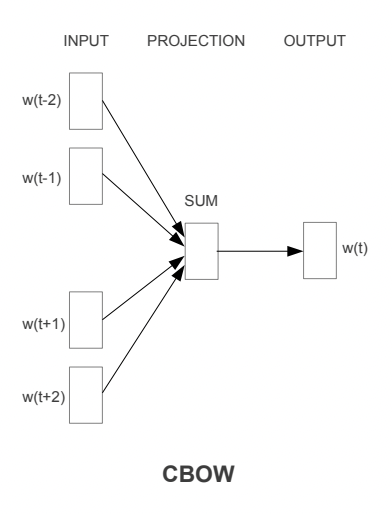

In [ ]:
# https://radimrehurek.com/gensim/models/word2vec.html

def create_w2v_embedding(column_name):

  '''
    This function creates the word2vec embedding using genism libraries
  '''
  w2v_embedding = []
  # Word2vec takes words as list
  words = [word.split() for word in X_train_title[column_name].values]
  model = Word2Vec(words, window=3, min_count=1, workers=-1)


  document = list (X_train_title[column_name].values)
  # every sentence in  document
  for sentence in document:
    #  embedding vector length is 100
    embedding = np.zeros(100) 
    # for every word in  sentence
    for word in sentence : 
        # check if word exist in model vector vocab
        if word in model.wv.vocab:  
            vector = model.wv[word] 
            embedding += vector
    w2v_embedding.append(embedding)
  return w2v_embedding,words,model  



In [ ]:
w2v_embedding,words,model = create_w2v_embedding('pre_title')

In [ ]:
print (len(w2v_embedding))
print (len(w2v_embedding[0]))

12000
100


In [ ]:
print (model.wv.vocab)

{'close': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0750>, 'go': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0790>, 'activity': <gensim.models.keyedvectors.Vocab object at 0x7ff383db07d0>, 'user': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0810>, 'downtime': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0890>, 'get': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0910>, 'unlimited': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0950>, 'argument': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0990>, 'without': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0850>, 'parameter': <gensim.models.keyedvectors.Vocab object at 0x7ff383db08d0>, 'limit': <gensim.models.keyedvectors.Vocab object at 0x7ff383db09d0>, 'xsl': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0a10>, 'replace': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0a50>, 'entire': <gensim.models.keyedvectors.Vocab object at 0x7ff383db0a90>, 'node

In [ ]:
def similar_word2vec(embedding,query,model,n):

  '''
    This function calculates the cosine similarity and find the most 
    n similar question related to query vector
  '''
  q_embeddings = np.zeros(100)
  _list = query.split()
  for word in _list:
    if word in model.wv.vocab :
      vector = model.wv[word]
      q_embeddings += vector
  return find_cosine_similarity(embedding,[q_embeddings],10)   
  

In [ ]:
ans = similar_word2vec(w2v_embedding,text,model,10)
print (ans)

<====> total time taken is 0.03134918212890625 seconds <====>
{'Why is `sz +“text”` different from `sz + “text”` in coffeescript?': 0.22934317886173106, 'MDX Date Formatting': 0.22079704137220155, 'Get text from an array': 0.21641732042182915, 'Does git affect on my express?': 0.21551098218385695, '"No safari Extensions Certificate" error on Mac': 0.208424283340227, 'DAX Year over Year': 0.20559651569321374, 'Difference between git diff and git cherry': 0.20494895911049638, 'restricting regex code in Notepad++': 0.20143630151213884, 'how to fix 404 Page Error in such scenario?': 0.20056770783962674, 'How to dereference a reference in DWARF': 0.20032591157553278}


In [ ]:
print (tf.__version__)

2.7.0


**Using Universal Sentence Encoder Embedding**

https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder


This is one of the other sentences about vector mechanisms introduced by Google.
With embedding from the glove and word2vec we can not get the exact  context of the nearby words in the sentence , the vector values should change if the different sentence has the same words but is used in different contexts .

Universal sentence   encoder comes with two variants one with Transformers like BERT and one with Deep Averaging network , The variant with Transformers are more accurate and more computationally expensive but with  Deep Averaging Network it is less accurate and less computationally expensive. 

https://medium.com/tech-that-works/deep-averaging-network-in-universal-sentence-encoder-465655874a04
Deep Averaging Network


This uses composition functions that combine multiple words into vectors.

Composition function:
Unordered : context of other words does not matter
Syntactic : context of other words does matter.

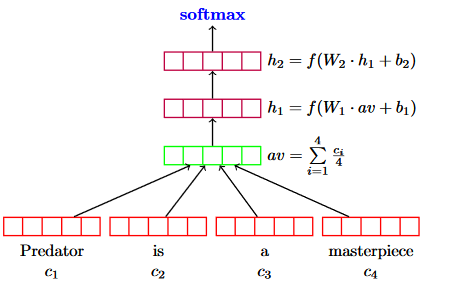

Unordered Example
Every word has c1,c2,c3,c4 as their composition function and then they are averaged and passed to the feed forward layer , this is simple and takes less time to train.


In [ ]:

import tensorflow_hub as hub

import tensorflow.compat.v1 as tf

In [ ]:
def create_universal_sentence_encoder_embedding(column_name):
  '''
  This function create the embedding for the sentences in our X_train for
  particular columm.
  '''
  #tf.logging.set_verbosity(tf.logging.ERROR)
  model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
  embedding = model(X_train_title[column_name].values)
  return model,embedding

In [ ]:
use_model,embedding = create_universal_sentence_encoder_embedding('pre_title')

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.


In [ ]:
embedding.shape

TensorShape([12000, 512])

In [ ]:
joblib.dump(use_model,'universal_sentence_encoder_model')

PicklingError: ignored

In [ ]:
@wrapper
def use_similarity(text,n,use_model=None,embedding=None):
    '''
    This function find the cosine similarity for the top n similar vector
    to query vectors.
    '''
    print (text)
    q_embedding = use_model([text])
    return find_cosine_similarity(embedding,q_embedding,10)

In [ ]:
print (text)
ans  = use_similarity(text,10)
print (ans)

JavaScript - Store multiple objects in array and access their properties via
<====> total time taken is 0.044538259506225586 seconds <====>
<====> total time taken is 0.05580329895019531 seconds <====>
{'JavaScript - Store multiple objects in array and access their properties via': 0.9145745, 'AngularJS order multiple objects array with object property': 0.69886696, 'JavaScript: Getting evaluated properties of an object': 0.6736724, 'Javascript array item overwritten': 0.66443026, 'How to get data from an array inside an object in javascript?': 0.6446701, 'Accessing values from an array of objects in MustacheJS': 0.64408726, 'javascript - setinterval causing objects to forget properties?': 0.64319885, 'Nodejs how to access a property of an object': 0.62084526, 'why array store duplicate value while iteration object inside the object ?': 0.61873597, 'javascript keeping a var within inner functions': 0.5925765}


**Using Sentence Bert Embedding**

https://www.pinecone.io/learn/sentence-embeddings/
The previous ways of doing bert embedding were average word bert embeddings and cls pooled output token which  we have used in the above bert embedding , the problem with  previous approaches it did not work well  as proven in various experiment also ,  the Sentence transformer using siamse network we are going to explain, in this we take two sentence one by one trhough bert model and then pass it through pooling layer to create 512X768 dimension into 768 dimension , let say them u and v vectors then as explained in figure-2 we concatenate u,v and u-v vectors and pass it through neural network as shown in figure-2 the more similar the sentence the more similar embeddings we get. 

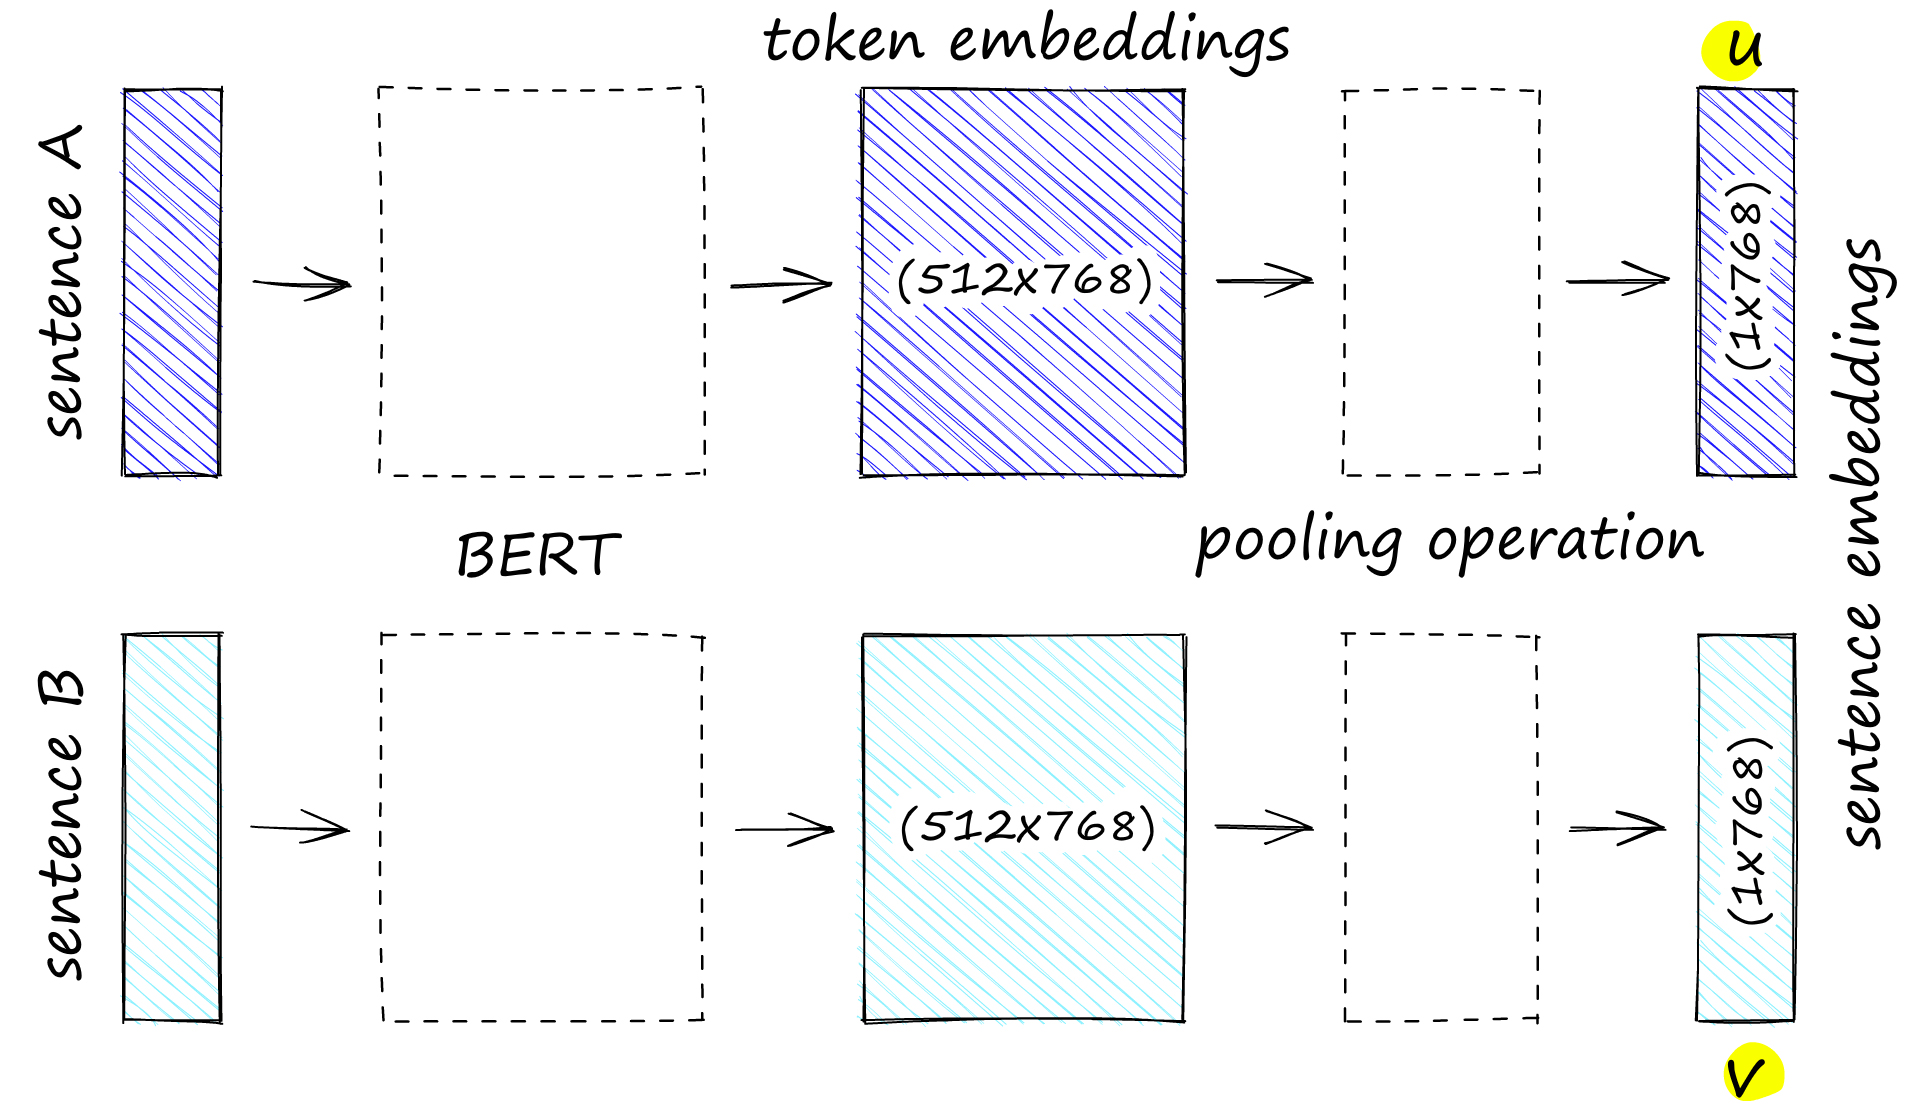

**Image-2**

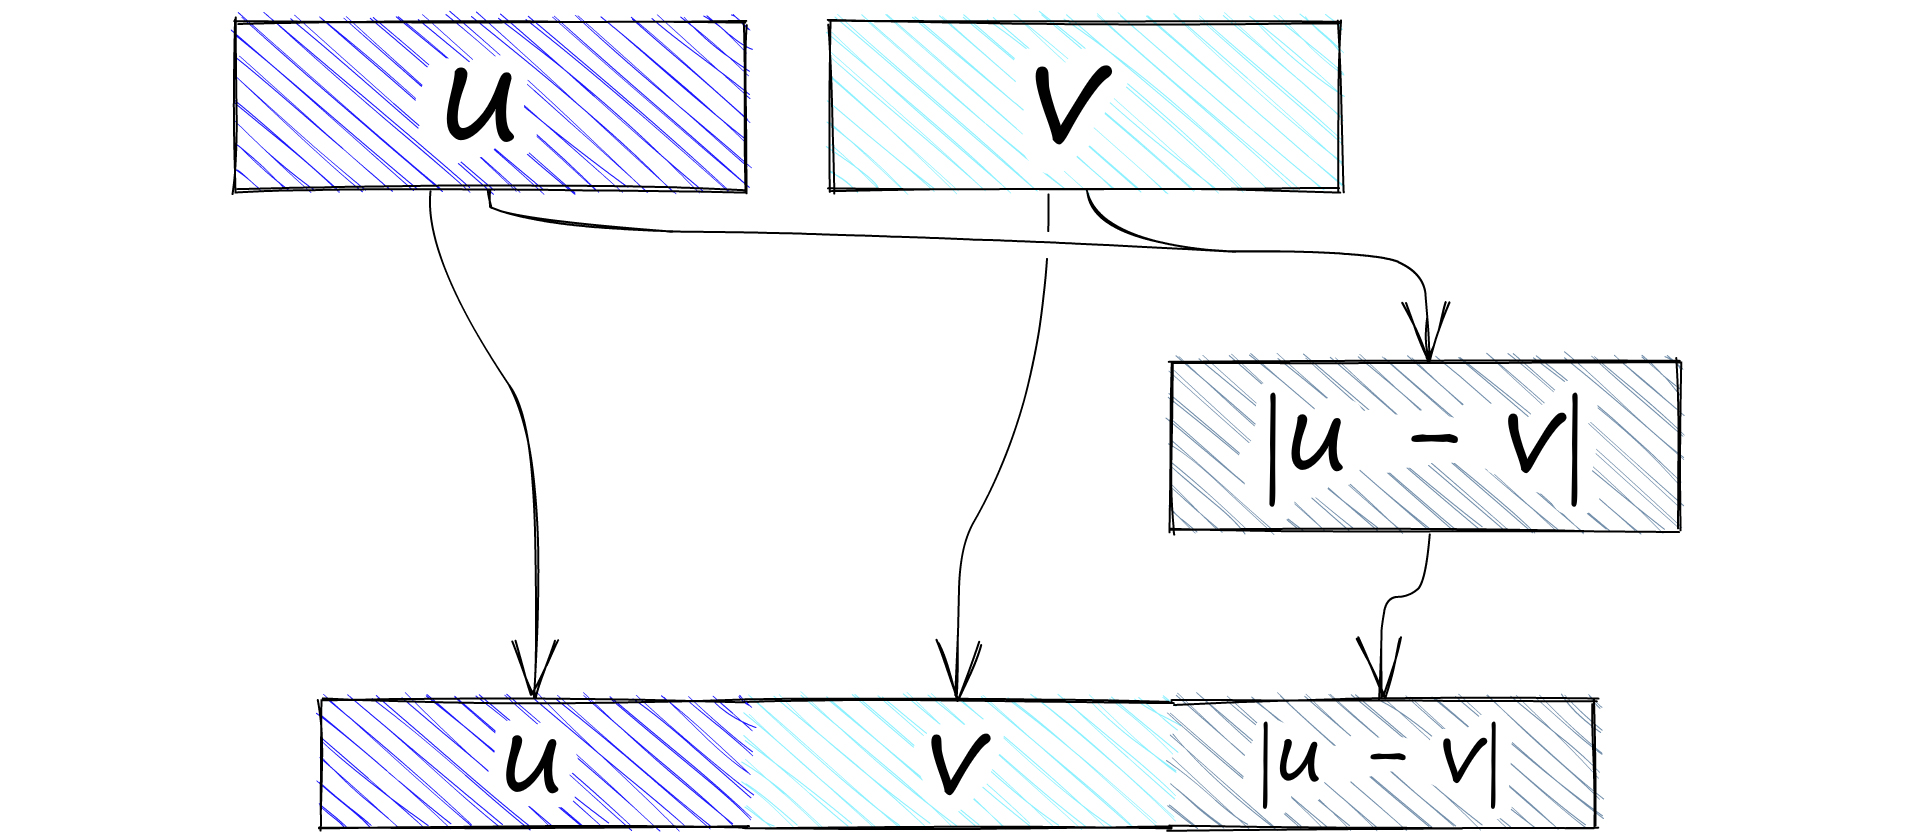

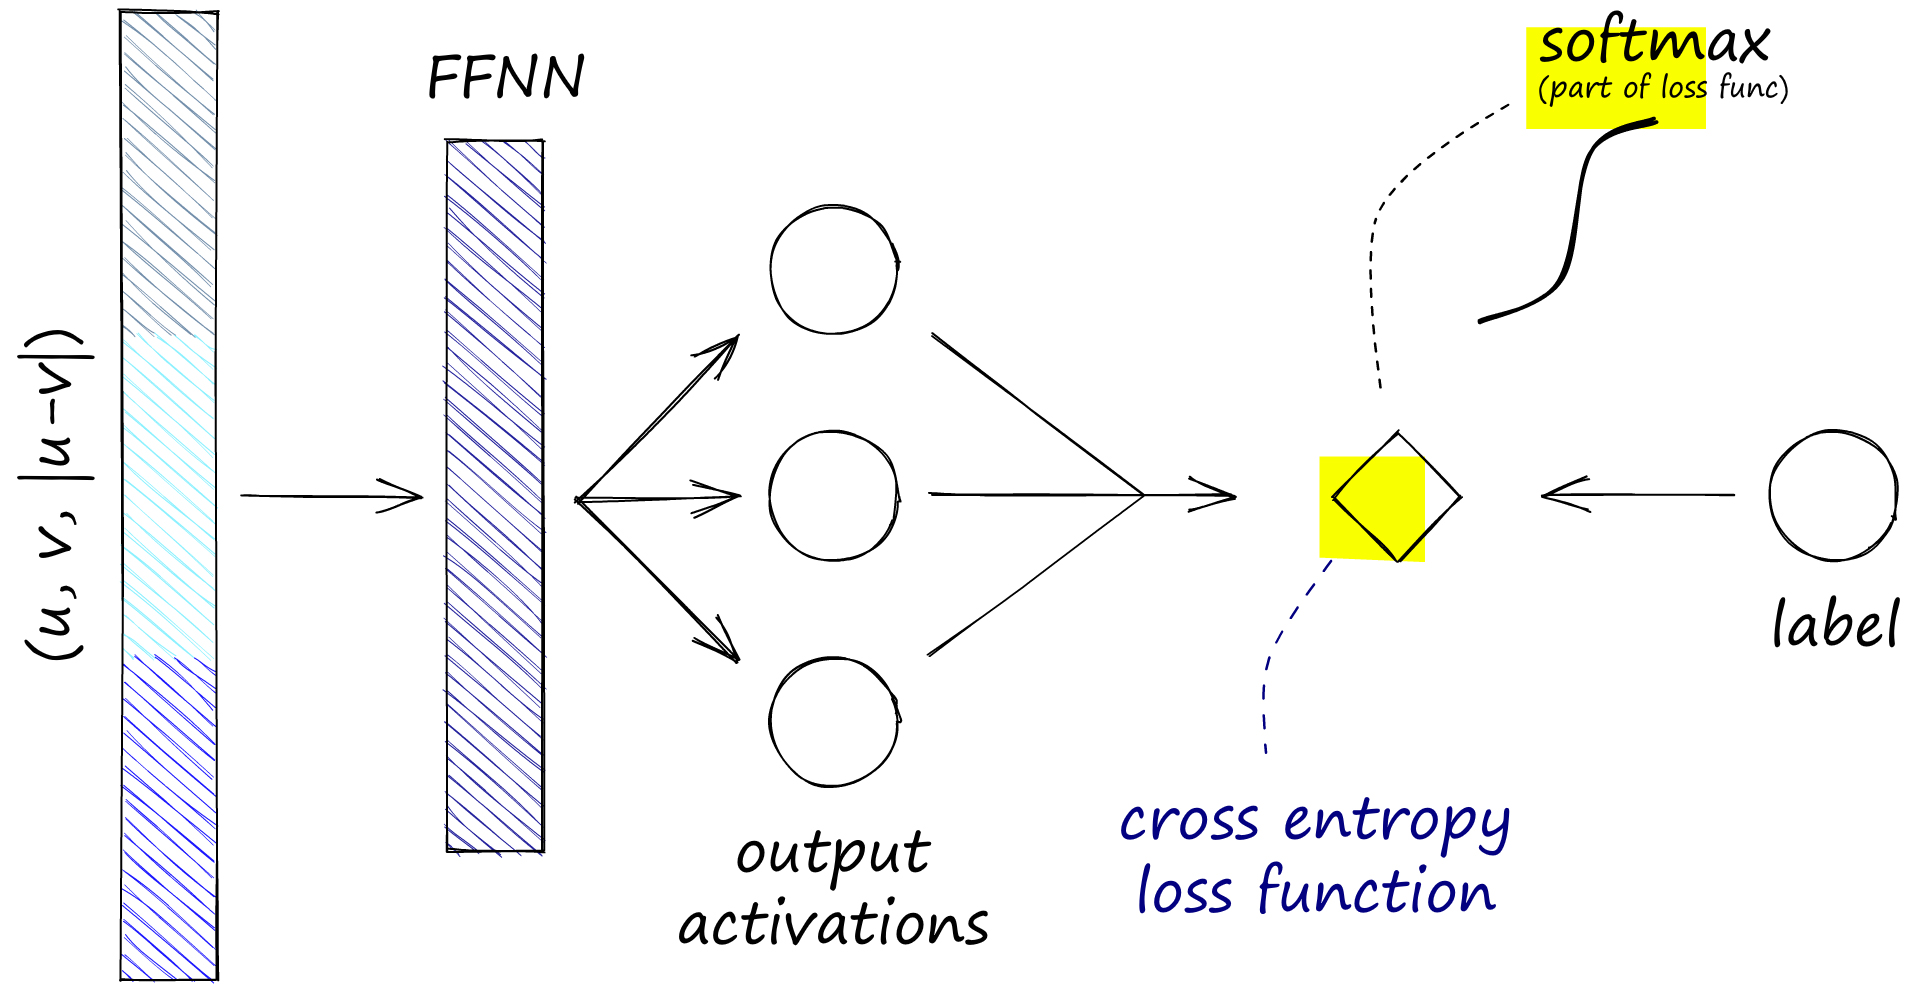

In [ ]:

# https://www.sbert.net/docs/usage/semantic_textual_similarity.html
def sbert(column_name):
  '''
  This function create the sentece bert embedding for our train data in particul
  ar column 
  '''
  model = SentenceTransformer('all-MiniLM-L6-v2')

  #Compute embeddings
  embeddings = model.encode(X_train_title[column_name].values, convert_to_tensor=True)
  return model,embeddings

In [ ]:
model_sbert,embeddings = sbert('pre_title')

In [ ]:
@wrapper
def sbert_similarity(text,n=10):
    '''
    This function find the n most closer vector to the query vector, so that we
    can find the similar semantic query which is already answered.
    '''
    print  (type(model))
    q_embedding = model_sbert.encode(text,convert_to_tensor=True)
    return find_cosine_similarity(embeddings,[q_embedding],10)
    

In [ ]:
print (pre_text)
ans = sbert_similarity(pre_text,10)
print (ans)

javascript store multiple objects array access properties via
<class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>
<====> total time taken is 0.054747819900512695 seconds <====>
<====> total time taken is 0.0857996940612793 seconds <====>
{'JavaScript - Store multiple objects in array and access their properties via': 1.0000001, 'How to get data from an array inside an object in javascript?': 0.74047244, 'JavaScript: Getting evaluated properties of an object': 0.6503894, 'How can I do array of objects': 0.6407466, 'How to access other property value from function as object property value in JavaScript?': 0.6343794, 'why array store duplicate value while iteration object inside the object ?': 0.62015676, "matrix of objects' array properties": 0.6152731, 'Access to the elements of Array of Jsons': 0.60604906, 'how to find specific record against array of json objects with complex /nested properties': 0.6008191, 'AngularJS order multiple objects array with object proper

# Considering both title and body of the question as a  feature

In [ ]:
X_train_title['combined'] = X_train_title['pre_title'] + X_train_title['pre_body']

**Glove_Vector as Embedding**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def res_complete(all_vectors,single_vectors,n):
    '''
    This is helper function to  create all the metrics we need 
    like cosine, eculidean and the score value of the question tables.
    '''
    # find the cosine values
    cosine,cvalues = find_cosine_similarity(all_vectors,single_vectors,n,complete=True)
    # finc the inverse euclidean distance
    inverse,values = inverse_euclidean_distance(all_vectors,np.array(single_vectors),n,complete=True) 
    df_glove = pd.DataFrame()
    # create a dataframe and store the result of the cosine and inverse 
    # eucludian distance seperately
    df_glove['question'] = list(cosine.keys())
    df_glove['cosine_value'] = list(cosine.values())
    df_glove['score'] = [X_train_title.iloc[i]['score'] for i  in cvalues]
    # normalizing the score values
    df_glove['score'] =  MinMaxScaler().fit_transform(np.array(df_glove['score']).reshape(-1,1))
    df_glove1  = pd.DataFrame()
    df_glove1['question'] = list(cosine.keys())
    df_glove1['euc'] = list(cosine.values())
    # normalizing the euclidean distance as the values can be greater than 0 and 1
    # normailizing it so that the values stays between 0 and 1
    df_glove1['euc'] = MinMaxScaler().fit_transform(np.array(df_glove1['euc']).reshape(-1,1))
    df_glove1['score'] = [X_train_title.iloc[i]['score'] for i  in cvalues]
    df_glove1['score'] =  MinMaxScaler().fit_transform(np.array(df_glove1['score']).reshape(-1,1))
    return df_glove,df_glove1

In [ ]:
@wrapper
def glove_vectors(column_name='combined',text=None,n=10,complete=False):
  '''
  This is a generic function to calculate glove_vectors and the cosine similarity
  if parameter complete is true we calculate all the metrics score, like cosine 
  and euclidean and normalized score of the column score of the table.
  '''

  dictionary,tfidf_words,preprocessed_title = create_glove_embedding(column_name)
  tfidf_w2v_vectors = create_average_tfidf_w2v(preprocessed_title,tfidf_words,dictionary)
  
  ##############################################################################
  # infernece 
  vector = np.zeros(300)
  vector = create_average_tfidf_w2v([text],tfidf_words,dictionary)
  print (" ====   To find the similar query for  ====")
  print (text)    
  print ("============================================")
  ##############################################################################
  # finding only cosine similarity
  if complete==True:
    return res_complete(tfidf_w2v_vectors,vector,n)
  else:
    cosine = find_cosine_similarity(tfidf_w2v_vectors,vector,n)
    print (cosine)
    return None


In [ ]:
glove_vectors(text=pre_text)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


len of tfidf vector =  12000
len of individual vector= 300
len of tfidf vector =  1
len of individual vector= 300
 ====   To find the similar query for  ====
javascript store multiple objects array access properties via
<====> total time taken is 0.056456565856933594 seconds <====>
{'How to get data from an array inside an object in javascript?': 0.8996364342915334, 'How to pass an array with multiple mesh objects': 0.88779828226306, 'chai - expect an array contains a JSON with a pair of desired key and value': 0.8834010375347388, 'Accumulate constant value in Numpy Array': 0.8819497867863277, 'Unable to update Microsoft Azure Container Permissions via AJAX': 0.8815954883523174, 'How to get the element in an array?(python)': 0.8782330351987857, 'Select elements from a Javascript Array using one of the elements as a reference point': 0.8766772360903836, 'Inserting an object inside an array fails': 0.8740573635912687, 'getting values from array that got indexes in second array': 0.873584

**Word2vec using genism as Embedding**

In [ ]:
@wrapper
def w2v_vectors(column_name='combined',text=None,n=10,complete=False):
  '''
  This is a generic function to calculate word2vec_vectors and the cosine similarity
  if parameter complete is true we calculate all the metrics score, like cosine 
  and euclidean and normalized score of the column score of the table.
  '''

  w2v_embedding,words,model = create_w2v_embedding(column_name)
  ##############################################################################
  q_embeddings = np.zeros(100)
  _list = text.split()
  for word in _list:
    if word in model.wv.vocab :
      vector = model.wv[word]
      q_embeddings += vector
  if complete==True:
    return res_complete(w2v_embedding,[q_embeddings],n)
  else:
    cosine = find_cosine_similarity(w2v_embedding,[q_embeddings],n)
    
    ans = cosine
    print (" ====   To find the similar query for  ====")
    print (text)    
    print ("============================================")
    print (ans)
    return None

In [ ]:
w2v_vectors(text=pre_text)

<====> total time taken is 0.026322364807128906 seconds <====>
 ====   To find the similar query for  ====
javascript store multiple objects array access properties via
{'how to tag image in docker registry v2': 0.2786444520382965, 'gorethink inner join': 0.2327468620958721, 'How to create AWS SNS Topic in code (iOS Mobile Hub SDK)': 0.20479605737102147, 'Testing model saving using devise': 0.20467595955617165, 'Laravel request validation message formatting': 0.2004423117547728, 'GWT, how to make i18n for @DefaultStringArrayValue messages': 0.19794469232849876, 'View Qt5.6 QStrings in Visual Studio 2015 Debugger': 0.19555281874555203, 'How to turn quiz from the text type to the image type in android?': 0.19554770228683976, 'ManytoMany Entities Select Query Doctrine': 0.1948407725744909, 'Updating existing security group using heat': 0.19475982653260787}
<====> total time taken is 37.55677533149719 seconds <====>


**Universal Sentence Encoder Embedding** 

In [ ]:
@wrapper
def use_vectors(column_name='combined',text=None,n=10,complete=False):
  '''
  This is a generic function to calculate univresal sentence encoder and the cosine similarity
  if parameter complete is true we calculate all the metrics score, like cosine 
  and euclidean and normalized score of the column score of the table.
  '''

  model,embedding = create_universal_sentence_encoder_embedding(column_name)
  q_embedding = model([text])
  if complete==True:
    return res_complete(embedding,q_embedding,n)
  else:
    cosine = find_cosine_similarity(embedding,q_embedding,n)
    
    print (" ====   To find the similar query for  ====")
    print (text)    
    print ("============================================")
    print (cosine)


In [ ]:
use_vectors()

<====> total time taken is 0.05844306945800781 seconds <====>
<====> total time taken is 0.06827569007873535 seconds <====>
 ====   To find the similar query for  ====
JavaScript - Store multiple objects in array and access their properties via
{'JavaScript - Store multiple objects in array and access their properties via': 0.9145745, 'AngularJS order multiple objects array with object property': 0.69886696, 'Javascript make an object from array of strings': 0.6898818, 'JavaScript: Getting evaluated properties of an object': 0.67367244, 'Javascript array item overwritten': 0.66443014, 'How to get data from an array inside an object in javascript?': 0.6446701, 'Accessing values from an array of objects in MustacheJS': 0.6440873, 'javascript - setinterval causing objects to forget properties?': 0.6431987, 'Nodejs how to access a property of an object': 0.6208453, 'why array store duplicate value while iteration object inside the object ?': 0.6187359}


**Sentece Bert Embedding** 

In [ ]:
def sbert_vectors(column_name='combined',text=None,n=10,complete=False):
  '''
  This is a generic function to calculate sentence bert and the cosine similarity
  if parameter complete is true we calculate all the metrics score, like cosine 
  and euclidean and normalized score of the column score of the table.
  '''

  model,embeddings = sbert(column_name)
  start = time.time()
  q_embedding = model.encode(text,convert_to_tensor=True)
  
  if complete==True:
    return res_complete(embeddings,[q_embedding],n)
  else:
    cosine = find_cosine_similarity(embeddings,[q_embedding],n)
    print (" ====   To find the similar query for  ====")
    print (text)    
    print ("============================================")
    print (cosine)
  end = time.time()
  print ("total time taken in seconds is",end-start)  

In [ ]:
sbert_vectors()

<====> total time taken is 0.03907489776611328 seconds <====>
<====> total time taken is 0.07136750221252441 seconds <====>
{'JavaScript - Store multiple objects in array and access their properties via': 0.96622115, 'How to get data from an array inside an object in javascript?': 0.7791376, 'Javascript make an object from array of strings': 0.6791887, 'How can I do array of objects': 0.65168595, 'why array store duplicate value while iteration object inside the object ?': 0.6430123, 'JavaScript: Getting evaluated properties of an object': 0.64195585, 'Accessing values from an array of objects in MustacheJS': 0.6391003, 'Access array elements via mongoose': 0.62389094, 'How to access other property value from function as object property value in JavaScript?': 0.6137799, 'how to find specific record against array of json objects with complex /nested properties': 0.6115757}


**Bert as Embedding**

In [ ]:
@wrapper
def bert_vectors(text,column_name='combined',n=10,complete=False):
    '''
    This is a generic function to calculate bert embeddings and the cosine similarity
    if parameter complete is true we calculate all the metrics score, like cosine 
    and euclidean and normalized score of the column score of the table.
    '''

    tokenize_complete(column_name='combined')
    X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])
    ############################################################################
    #intializing tokens for query vector
    tokens = np.zeros([1,max_seq_length])
    #intializing mask for query vector
    mask = np.zeros([1,max_seq_length])
    #intializing segment for query vector 
    segment = np.zeros([1,max_seq_length])
    ############################################################################
    # tokenizing the text
    tokens =  tokenizer.tokenize(text)
    tokens =  tokens[0:(max_seq_length-2)]
    # generating with cls and ending with sep
    tokens =  ['[CLS]',*tokens,'[SEP]']
    l = len(tokens)
    final = max_seq_length - l
    # making the rest of the sentence padded so that when converting this to ids
    # its values will be zero , symbolizing no meanigful words are there.
    for j in range(final):
      tokens.append('[PAD]')
    # converting tokens to respective id's  
    tokens   = np.array(tokenizer.convert_tokens_to_ids(tokens))
    mask     = np.array([1]*l+[0]*(max_seq_length-l))
    segment  = np.array(([0]*max_seq_length))
    # expanding the dimension of the tokens, mask and segment so that bert model
    # can predict.
    tokens   = np.expand_dims(tokens,axis=0)
    mask     = np.expand_dims(mask,axis=0)
    segment  = np.expand_dims(segment,axis=0)
    print ("tokens=",tokens)
    print ("mask=",mask)
    print ("segment=",segment)
    ############################################################################
  
    ############################################################################
    ############################################################################
    output = bert_model.predict([tokens,mask,segment])
    if complete==True:
      return res_complete(X_train_pooled_output,output,n)
    else:
      cosine = find_cosine_similarity(X_train_pooled_output,output,n)
      print (" ====   To find the similar query for  ====")
      print (text)    
      print ("============================================")
      print (cosine)

In [ ]:
bert_vectors(text=pre_text)

Streaming output truncated to the last 5000 lines.
 'lt' 'ns' 'sob' '##ject' '##s' 'type' 'account' 'gt' 'lt' 'ns' 'id' 'gt'
 'b' 'mk' '##k' '##qa' '##am' 'lt' 'ns' 'id' 'gt' 'lt' 'ns' 'name' 'gt'
 'new' '##name' 'lt' 'ns' 'name' 'gt' 'lt' 'ns' 'sob' '##ject' '##s' 'gt'
 'lt' '[SEP]']
number of tokens : 70
tokens replaced with the poistional encoding :
 [  101  1060 14540  2102  5672 17961  3643  2595 19968  8318 20950  2544
 17181 21183  2546 14181  8318 24978 10651 20950  3619 24978 24471  2078
  6960  7815 16420  2953  3401  4012 14181  8318 24978 17540 20614  2015
  2828  4070 14181  8318 24978  8909 14181  1038 12395  2243 19062  3286
  8318 24978  8909 14181  8318 24978  2171 14181  2047 18442  8318 24978
  2171 14181  8318 24978 17540 20614  2015 14181  8318   102]
tokens are: 
 ['[CLS]' 'capture' 'final' 'value' 'text' 'view' 'dismissed' 'navigation'
 'controller' '##na' '##vi' '##gation' 'controller' 'view' 'controllers'
 'view' '##con' '##tro' '##ller' 'view' '##con' '##tro' 

**Testing queries with both body and title** 

In [ ]:
# importing pandasql to know javascript question as it is most used tag in this
# experiment.
import pandasql as ps
q1 = """SELECT title,pre_title,body,pre_body  FROM df1  where tags like '%javascript%' """

a = ps.sqldf(q1, locals())
text = a
# fetching the first row output of the title column
text =  a.iloc[1]['title']
# fetching the first row output of the title column
pre_text = a.iloc[1]['pre_title']
# printing the desired values
print ("text=",text)
print ("preprocessed text=",pre_text)

text= JavaScript - Store multiple objects in array and access their properties via
preprocessed text= javascript store multiple objects array access properties via


In [ ]:
# fetching the output of title and body 
text  =  text =  a.iloc[1]['title'] + a.iloc[1]['body']
pre_text = a.iloc[1]['pre_title']   + a.iloc[1]['pre_body']

In [ ]:
# printing the text and preprocessed text with title and body for which we
# need to test the different embeddings
print ("text ===== ", text)
print ("pre text ======",pre_text)

text =====  JavaScript - Store multiple objects in array and access their properties via<p>So here I have a database of user objects and I would like to push each one into the 'allUsers' array. I then want to be able to loop through this array and access a property e.g. <code>allUsers[i].genrePref</code>. How do I push all of these variables into the array to store them like <code>[user, jon, lucy, mike, luke...</code> </p>

<pre><code>    // Users
    var user = {username: user9110252username, genrePref: user9110252genre};
    var jon = {username: 'Jon', genrePref: 'rock'};
    var lucy = {username: 'Lucy', genrePref: 'pop'};
    var mike = {username: 'Mike', genrePref: 'rock'};
    var luke = {username: 'Luke', genrePref: 'house'};
    var james = {username: 'James', genrePref: 'house'};
    var dave = {username: 'Dave', genrePref: 'bass'};
    var sarah = {username: 'Sarah', genrePref: 'country'};
    var natalie = {username: 'Natalie', genrePref: 'bass'};


    // Users array
    v

**Glove Vectors**

In [ ]:
# glove vector embeddings for title +  body and the cosine similarity
glove_vectors(text=pre_text)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


len of tfidf vector =  12000
len of individual vector= 300
len of tfidf vector =  1
len of individual vector= 300
 ====   To find the similar query for  ====
javascript store multiple objects array access properties viadatabase user objects would like push one allusers array want able loop array access property e g allusers genrepref push variables array store like user jon lucy mike luke users var user username user username genrepref user genre var jon username jon genrepref rock var lucy username lucy genrepref pop var mike username mike genrepref rock var luke username luke genrepref house var james username james genrepref house var dave username dave genrepref bass var sarah username sarah genrepref country var natalie username natalie genrepref bass users array var allusers
<====> total time taken is 0.2566525936126709 seconds <====>
{'JavaScript - Store multiple objects in array and access their properties via': 0.9999999999999999, 'JavaScript - prevent push of certain element 

**Word2Vec**

In [ ]:
# Word2Vec using gensim library for both title + question and the cosine similarity
w2v_vectors(text=pre_text)

<====> total time taken is 0.036826133728027344 seconds <====>
 ====   To find the similar query for  ====
javascript store multiple objects array access properties viadatabase user objects would like push one allusers array want able loop array access property e g allusers genrepref push variables array store like user jon lucy mike luke users var user username user username genrepref user genre var jon username jon genrepref rock var lucy username lucy genrepref pop var mike username mike genrepref rock var luke username luke genrepref house var james username james genrepref house var dave username dave genrepref bass var sarah username sarah genrepref country var natalie username natalie genrepref bass users array var allusers
{'Fitness and motion permission notification not popping up inside the app': 0.15846721708688224, 'Access controls from WPF project in nomal winforms project': 0.15845778978934744, 'Loop nested animate function in jQuery': 0.15240730761061638, 'SharePoint 201

**Universal Sentence Encoder**

In [ ]:
# universal sentence encoder output with title and body and the cosine similarity
use_vectors(text=pre_text)

<====> total time taken is 0.038570404052734375 seconds <====>
 ====   To find the similar query for  ====
javascript store multiple objects array access properties viadatabase user objects would like push one allusers array want able loop array access property e g allusers genrepref push variables array store like user jon lucy mike luke users var user username user username genrepref user genre var jon username jon genrepref rock var lucy username lucy genrepref pop var mike username mike genrepref rock var luke username luke genrepref house var james username james genrepref house var dave username dave genrepref bass var sarah username sarah genrepref country var natalie username natalie genrepref bass users array var allusers
{'JavaScript - Store multiple objects in array and access their properties via': 1.0000001, 'JavaScript - prevent push of certain element into an array if condition is true': 0.63381827, "Setting a child's name with string on Firebase": 0.53506804, 'Storing a

**Sentence Bert**

In [ ]:
# it takes too much time to get embeddings so stopped not trying on thesse
#sbert_vectors(text=pre_text)

**Bert**

In [ ]:
# bert output with title and body and the cosine similarity
bert_vectors(text=pre_text)

Streaming output truncated to the last 5000 lines.
 'lt' 'ns' 'sob' '##ject' '##s' 'type' 'account' 'gt' 'lt' 'ns' 'id' 'gt'
 'b' 'mk' '##k' '##qa' '##am' 'lt' 'ns' 'id' 'gt' 'lt' 'ns' 'name' 'gt'
 'new' '##name' 'lt' 'ns' 'name' 'gt' 'lt' 'ns' 'sob' '##ject' '##s' 'gt'
 'lt' '[SEP]']
number of tokens : 70
tokens replaced with the poistional encoding :
 [  101  1060 14540  2102  5672 17961  3643  2595 19968  8318 20950  2544
 17181 21183  2546 14181  8318 24978 10651 20950  3619 24978 24471  2078
  6960  7815 16420  2953  3401  4012 14181  8318 24978 17540 20614  2015
  2828  4070 14181  8318 24978  8909 14181  1038 12395  2243 19062  3286
  8318 24978  8909 14181  8318 24978  2171 14181  2047 18442  8318 24978
  2171 14181  8318 24978 17540 20614  2015 14181  8318   102]
tokens are: 
 ['[CLS]' 'capture' 'final' 'value' 'text' 'view' 'dismissed' 'navigation'
 'controller' '##na' '##vi' '##gation' 'controller' 'view' 'controllers'
 'view' '##con' '##tro' '##ller' 'view' '##con' '##tro' 

**Test questions containing links**

In [ ]:
# check for a link in test
# checking for the first title in our dataset with url
import regex as re
count = 0
# iterating over the complete dataset
for i  in  list(df1['title'].values):
  # https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php
  all_value = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', i)
  count =count+1
  # if nothing is found through regular expression 
  if len(all_value)==0:
    continue
  else:
    print(i)
    print (count)
    break
     

How do you list the files in your home directory in RCloud (http://rcloud.social)?
8199


In [ ]:
# store the index of the data for which we get the text ande 
# preprocessed text.
text = df1.iloc[8198]['title']
pre_text = df1.iloc[8198]['pre_title']
print (text)
print (pre_text)

How do you list the files in your home directory in RCloud (http://rcloud.social)?
list files home directory rcloud http rcloud social


**Glove Vectors**

In [ ]:
# calculating  glove vectors embedding and the cosine similarity  for the  link data
glove_vectors(text=pre_text)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


len of tfidf vector =  12000
len of individual vector= 300
len of tfidf vector =  1
len of individual vector= 300
 ====   To find the similar query for  ====
list files home directory rcloud http rcloud social
<====> total time taken is 0.0554652214050293 seconds <====>
{'How can I get a list of package locations from a PIP requirements file?': 0.9070469012700741, 'Spark scala input/output directories': 0.8949272587305082, 'Atlasstian/Stash Git API - Getting names of files modified between commit': 0.8938262691075519, 'Access my application in AWS': 0.8917832344963487, 'Angular ui-view (UI-Router) not rendering template - plunker included': 0.8913327103045641, 'How to dynamically update an existing README.md with a list of WordPress plugins?': 0.8876165519561157, 'linux - give the list of file in date sorted way with modification time before 2 days': 0.8872045448060343, 'Iterating through a .txt file in an odd way': 0.8871648367573397, 'Equivalent of HTTP Post upload binary file in VBS

**Word2Vec**

In [ ]:
w2v_vectors(text=pre_text)

<====> total time taken is 0.024565458297729492 seconds <====>
 ====   To find the similar query for  ====
list files home directory rcloud http rcloud social
{'Make every nth observation an adjacent column': 0.18856859747798577, 'WinForms datagrid inverted so that column headers become (repeating) row labels': 0.16739353036828947, 'Dummy indicator for cross country ID repetitions': 0.16548171519294635, 'Script to bring together all relevant accession into its root access': 0.1568495042337896, 'I want to make circular list with common lisp': 0.15665348481235478, 'How to store all of data instead of the last one on JSON?': 0.1484090296206267, 'use value (string) from table 1 to refer columns of another table': 0.1400500082464493, 'How does the [ng\\:cloak] selector format work?': 0.13827939801742684, 'CASE not working in oracle': 0.13724261268418766, 'How to I make docker start as a service on OS X?': 0.1363363061393091}
<====> total time taken is 36.99247074127197 seconds <====>


**Universal Sentence Encoder**

In [ ]:
# universal sentence encoder embedding and its cosine similarity for the link data
use_vectors(text=pre_text)

list files home directory rcloud http rcloud social
<====> total time taken is 0.03872346878051758 seconds <====>
<====> total time taken is 0.044547080993652344 seconds <====>
 ====   To find the similar query for  ====
list files home directory rcloud http rcloud social
{'Get a value of a key from an array of inconsistent file paths': 0.43425274, 'How to add directory in CVS': 0.41976, 'linux - give the list of file in date sorted way with modification time before 2 days': 0.41496813, 'Redirect from webhotel to local apache webserver; Keep domainname': 0.39893466, 'Command script recognizes files as directories': 0.39709854, "apache configuration extension doesn't work with https": 0.39266148, 'Restore inaccessible folder': 0.38220987, 'Moving User Public Key to common folder for IIS to work': 0.3771157, 'htaccess redirect to a parent folder': 0.3746124, 'Redirect All Requests for a Nonexistent File inside directory to the a specific file in the root': 0.37071973}
<====> total time t

In [ ]:
# bert embedfing and the cosine similarity for the link data
bert_vectors(text=pre_text)

Streaming output truncated to the last 5000 lines.
 'lt' 'ns' 'sob' '##ject' '##s' 'type' 'account' 'gt' 'lt' 'ns' 'id' 'gt'
 'b' 'mk' '##k' '##qa' '##am' 'lt' 'ns' 'id' 'gt' 'lt' 'ns' 'name' 'gt'
 'new' '##name' 'lt' 'ns' 'name' 'gt' 'lt' 'ns' 'sob' '##ject' '##s' 'gt'
 'lt' '[SEP]']
number of tokens : 70
tokens replaced with the poistional encoding :
 [  101  1060 14540  2102  5672 17961  3643  2595 19968  8318 20950  2544
 17181 21183  2546 14181  8318 24978 10651 20950  3619 24978 24471  2078
  6960  7815 16420  2953  3401  4012 14181  8318 24978 17540 20614  2015
  2828  4070 14181  8318 24978  8909 14181  1038 12395  2243 19062  3286
  8318 24978  8909 14181  8318 24978  2171 14181  2047 18442  8318 24978
  2171 14181  8318 24978 17540 20614  2015 14181  8318   102]
tokens are: 
 ['[CLS]' 'capture' 'final' 'value' 'text' 'view' 'dismissed' 'navigation'
 'controller' '##na' '##vi' '##gation' 'controller' 'view' 'controllers'
 'view' '##con' '##tro' '##ller' 'view' '##con' '##tro' 

***Combining all metrics score***

In [ ]:
# out of top20 we will find the best 10
def total_score(func_name,pre_text):
  '''
  This function computes the total score with formulae 0.6*cosine_score+0.2*
  inveted euclidena_score + 0.2*score_of_question  
  '''
  cosine_weight = 0.6
  euc_weight = 0.2
  score_weight = 0.2  

  df_ans,df_ans1 = func_name(column_name='pre_title',text=pre_text,complete=True,n=20)
  # https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
  df3 = pd.merge(df_ans,df_ans1)
  # fill the values of nan with zero
  df3.fillna(0)
  final_score = []
  # iterate the dataframe and use the formulae
  for index,row in df3.iterrows():
    final_score.append((row['cosine_value']*0.6) + (row['score']*0.2) + (row['euc']*0.2))

  df3['final_score']=final_score
  df3=df3.sort_values(by=['final_score'],ascending=False)
  return df3

In [ ]:
df3 = total_score(glove_vectors)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


len of tfidf vector =  12000
len of individual vector= 300
len of tfidf vector =  1
len of individual vector= 300
 ====   To find the similar query for  ====
javascript store multiple objects array access properties via
<====> total time taken is 0.0584568977355957 seconds <====>
<====> total time taken is 1.496220350265503 seconds <====>


In [ ]:
df3

question  ...  final_score
0   JavaScript - Store multiple objects in array a...  ...     1.000000
1                  Access array elements via mongoose  ...     0.668042
3   how to find specific record against array of j...  ...     0.646723
15  How to access the fetched object property that...  ...     0.637407
4        Access hash values in java to create objects  ...     0.627562
5   Rails: How to access properties in builder object  ...     0.627222
6   Allowing anonymous access to list of just publ...  ...     0.624654
7   JavaScript: Getting evaluated properties of an...  ...     0.615352
8   Create a drop down using keys of objects withi...  ...     0.614543
9   AngularJS order multiple objects array with ob...  ...     0.611948
10  How do I get this 'Sorted Union' function to w...  ...     0.597669
16  What's the most efficient way to build a URL f...  ...     0.596176
2   How to get data from an array inside an object...  ...     0.593890
18  javascript function with two elements and web ...  ...     0.590108
11  How do I access an Array Value using it's Key ...  ...     0.590102
12  Need help fetching salesforce data of multiple...  ...     0.588436
13  How do I use array reduce to sum object proper...  ...     0.588430
14  Access Form filter with multiple items in a field  ...     0.587984
19  How to get the number of tags having certain p...  ...     0.572147
17  Using Defined Constants that will show up via ...  ...     0.560338

[20 rows x 5 columns]

In [ ]:
df3 = total_score(w2v_vectors)

<====> total time taken is 0.039231061935424805 seconds <====>
<====> total time taken is 3.4135665893554688 seconds <====>


In [ ]:
df3

question  ...  final_score
11  how to show query while using query annotation...  ...     0.365124
0               Posting some dynamic data with jquery  ...     0.358562
1                        Grouping queries in Mongoose  ...     0.328670
2                            Jquery comparing 2 items  ...     0.274407
3   Can I request Card_Nonce without using SqPayme...  ...     0.240324
4            Green square on game canvas using Phaser  ...     0.228586
7   What should be the Http Status code for Reques...  ...     0.227704
5                Linq query projecting Id's not names  ...     0.208000
6           scipy PLS getting the regression equation  ...     0.205654
9     Generating json output from jquery appended div  ...     0.182388
8                        jQuery append icon only once  ...     0.182300
10  VSTS Continuous Integration: NuGet package are...  ...     0.179677
12  Adding unique items to dictionary from data frame  ...     0.159897
13                          Converting a query to CNF  ...     0.159867
14  testing an API endpoint with a curl request, G...  ...     0.152402
15  Do you need a unique IP address for each Amazo...  ...     0.147789
18  Change only one axis of padding property maint...  ...     0.141875
16            Joining sequence and document in XQUERY  ...     0.139399
17                      queue container with map type  ...     0.138664
19        Reading Echo from .cmd file output using Qt  ...     0.136063

[20 rows x 5 columns]

In [ ]:
df3 = total_score(use_vectors)

<====> total time taken is 0.04759573936462402 seconds <====>
<====> total time taken is 6.796862840652466 seconds <====>


In [ ]:
df3

question  ...  final_score
0   JavaScript - Store multiple objects in array a...  ...     0.984615
15  lodash get items from array that does not matc...  ...     0.563713
1   AngularJS order multiple objects array with ob...  ...     0.560164
2   JavaScript: Getting evaluated properties of an...  ...     0.500521
4   why array store duplicate value while iteratio...  ...     0.482132
5   underscoreJS- form a new array with items in a...  ...     0.453423
3   How to get data from an array inside an object...  ...     0.450387
6       Converting array of json objects to 2-D array  ...     0.440834
7   Javascript - How can I display the value of an...  ...     0.440512
12  how to find specific record against array of j...  ...     0.436795
8            Access to the elements of Array of Jsons  ...     0.434278
10                matrix of objects' array properties  ...     0.432545
11  How to access other property value from functi...  ...     0.426081
16                 Access array elements via mongoose  ...     0.423291
9   PHP Multidimensional Array to JSON Array of Ob...  ...     0.417642
13    javascript keeping a var within inner functions  ...     0.412025
14    How to pass an array with multiple mesh objects  ...     0.411520
17  how to compare array of ids with object array ...  ...     0.407672
19  Angular JS Repeating through 2 Arrays In Unord...  ...     0.401570
18              Convert Object holding arrays to JSON  ...     0.389036

[20 rows x 5 columns]

In [ ]:
df4 = pd.DataFrame()
df4['Embeddings'] = ['Pretrained glove', 'Bert', 'Universal Sentence Encoder', 'W2v genism', 'Sentence Bert']
df4['Only inference Time for title '] = ['0.15s','0.19s','0.55s','0.35s','0.85s']
df4['Total Time for title+body'] = ['35s','128s','47s','31s','Na']



In [ ]:
df4

Embeddings  ... Total Time for title+body
0            Pretrained glove  ...                       35s
1                        Bert  ...                      128s
2  Universal Sentence Encoder  ...                       47s
3                  W2v genism  ...                       31s
4               Sentence Bert  ...                        Na

[5 rows x 3 columns]

Conclusions:
  Sbert is accurate but it take more time to get all embeddings in the document, pretrained glove vectors are fast and to some extent good , but with title and question body it didn't preform that well , the best embedding is  universal sentence encoder it works well for both title and question body , question body with links.